# K-means clustering demo #

## Gaussian Mixture distribution ##

In [1]:
import numpy as np
from kmeans import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import cos, sin, pi

K = 8
CLUSTERS = 8

Sample data will be automatically generated from evenly spaced rotations along (0, 0) center

In [2]:
def rotate(points, theta):
    return np.matmul(np.array([[cos(theta), -sin(theta)],
                               [sin(theta), cos(theta)]]), points)

def sample_data(points=100, clusters=4, std=0.1):
    data = []

    for i in range(points//4):
        for j in range(clusters):
            data.append(rotate(np.random.normal(np.array([1, 0]), std), j * 2 * pi / clusters))

    return np.array(data)

We fit the model to the random generated data

In [3]:
data = sample_data(100, clusters=CLUSTERS, std=0.08)
model = KMeans(k=K)
model.fit(data)

Then we plot each point data with the color of the corresponding cluster predicted by `model.predict` together with the centroids of each cluster.

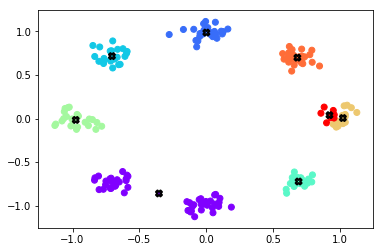

In [4]:
clusters = model.predict(data)
colors = cm.rainbow(np.linspace(0, 1, K))
plt.scatter(data[...,0], data[...,1], color=list(map(lambda idx: colors[idx], clusters)))
plt.scatter(model._centroids[...,0], model._centroids[...,1], color=colors, edgecolors=['black'] * 4,linewidths=2, marker='X')
plt.show()